In [1]:
import scanpy as sc
from anndata import read_h5ad
import pandas as pd
import numpy as np
import scipy as sp
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
import os

# scTRS tools
import scdrs.util as util
import scdrs.data_loader as dl
import scdrs.method as md

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# File paths
DATA_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data'
FIG_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/results/fig_tcell'
DS_LIST = ['facs', 'droplet']

# Score files
DIC_SCORE_PATH = {'facs': DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_1000',
                  'droplet': DATA_PATH+'/score_file/score.tms_droplet_with_cov.magma_10kb_1000',
                  'facs_tsig': DATA_PATH+'/score_file/score.tms_facs_with_cov.tcell_sig',
                  'droplet_tsig': DATA_PATH+'/score_file/score.tms_droplet_with_cov.tcell_sig'}

DIC_TRAIT_LIST = {}
DIC_TRAIT_LIST = {'facs': ['PASS_IBD'], 
                  'droplet': ['PASS_IBD'], 
                  'facs_tsig': ['naive_cd4', 'memory_cd4', 'effector_cd4', 
                                'naive_cd8', 'memory_cd8', 'effector_cd8'], 
                  'droplet_tsig': ['naive_cd4', 'memory_cd4', 'effector_cd4', 
                                   'naive_cd8', 'memory_cd8', 'effector_cd8']}

In [3]:
# Load raw data 
dic_data_raw = {}
dic_data_raw['facs'] = dl.load_tms_ct(DATA_PATH, data_name='facs')
dic_data_raw['droplet'] = dl.load_tms_ct(DATA_PATH, data_name='droplet')

Trying to set attribute `.obs` of view, copying.


In [4]:
# Load score 
dic_score = {x:pd.DataFrame() for x in DIC_SCORE_PATH}
for score in DIC_SCORE_PATH:
    for trait in DIC_TRAIT_LIST[score]:
        file_path = DIC_SCORE_PATH[score]+'/%s.score.gz'%trait
        if os.path.exists(file_path):
            temp_df = pd.read_csv(file_path, sep='\t', index_col=0)
            temp_df.columns = ['%s.%s'%(trait,x) for x in temp_df.columns]
            temp_df['%s.fdr'%trait] = multipletests(temp_df['%s.pval'%trait], method='fdr_bh')[1]
            dic_score[score] = pd.concat([dic_score[score], temp_df], axis=1)
        else:
            print('# missing: %s'%file_path)   

# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/score.tms_facs_with_cov.magma_10kb_1000/PASS_IBD.score.gz
# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/score.tms_droplet_with_cov.magma_10kb_1000/PASS_IBD.score.gz
# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/score.tms_droplet_with_cov.tcell_sig/naive_cd4.score.gz
# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/score.tms_droplet_with_cov.tcell_sig/memory_cd4.score.gz
# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/score.tms_droplet_with_cov.tcell_sig/effector_cd4.score.gz
# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/score.tms_droplet_with_cov.tcell_sig/naive_cd8.score.gz
# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/score.tms_droplet_with_cov.tcell_sig/memory_cd8.score.gz
# missing: /n/holystore01/LABS/price_lab/Users/mjzhang/sc

### Get data for only T cells and rerun harmony+umap

facs
# Before filter: n_cell=4145
# After filter: n_cell=4145


2021-08-23 10:30:12,970 - harmonypy - INFO - Iteration 1 of 20
2021-08-23 10:30:16,500 - harmonypy - INFO - Iteration 2 of 20
2021-08-23 10:30:19,621 - harmonypy - INFO - Iteration 3 of 20
2021-08-23 10:30:21,508 - harmonypy - INFO - Iteration 4 of 20
2021-08-23 10:30:23,866 - harmonypy - INFO - Iteration 5 of 20
2021-08-23 10:30:25,444 - harmonypy - INFO - Iteration 6 of 20
2021-08-23 10:30:26,885 - harmonypy - INFO - Iteration 7 of 20
2021-08-23 10:30:28,321 - harmonypy - INFO - Iteration 8 of 20
2021-08-23 10:30:29,754 - harmonypy - INFO - Iteration 9 of 20
2021-08-23 10:30:31,365 - harmonypy - INFO - Iteration 10 of 20
2021-08-23 10:30:33,009 - harmonypy - INFO - Iteration 11 of 20
2021-08-23 10:30:34,484 - harmonypy - INFO - Iteration 12 of 20
2021-08-23 10:30:38,030 - harmonypy - INFO - Iteration 13 of 20
2021-08-23 10:30:39,500 - harmonypy - INFO - Iteration 14 of 20
2021-08-23 10:30:41,092 - harmonypy - INFO - Iteration 15 of 20
2021-08-23 10:30:42,374 - harmonypy - INFO - Iter

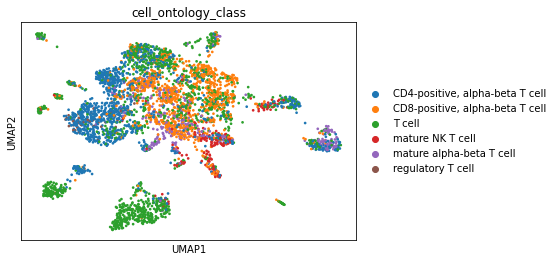

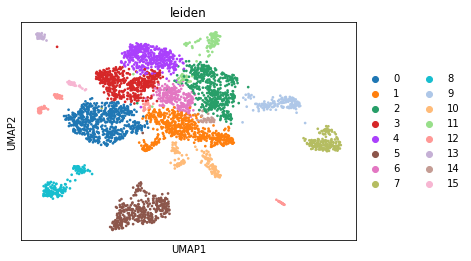

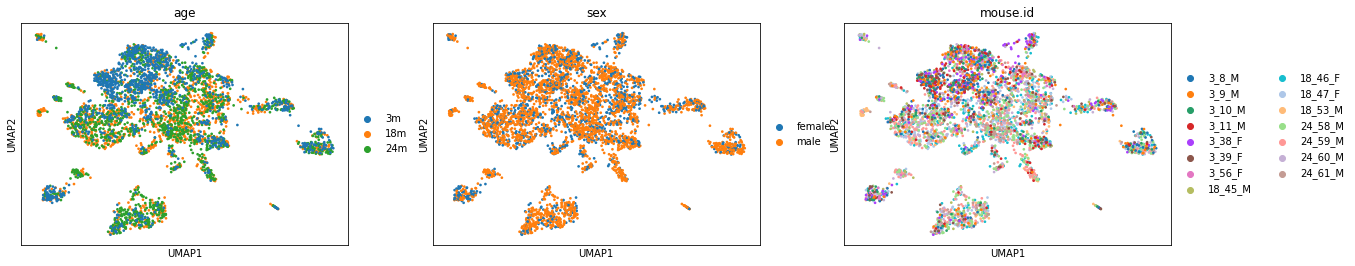

droplet
# Before filter: n_cell=20329
# After filter: n_cell=20329


2021-08-23 10:32:06,102 - harmonypy - INFO - Iteration 1 of 20
2021-08-23 10:32:19,353 - harmonypy - INFO - Iteration 2 of 20
2021-08-23 10:32:32,687 - harmonypy - INFO - Iteration 3 of 20
2021-08-23 10:32:45,944 - harmonypy - INFO - Converged after 3 iterations
... storing 'tissue_celltype' as categorical


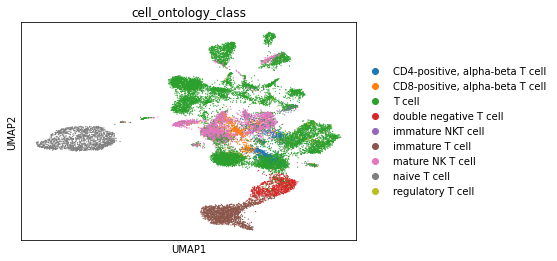

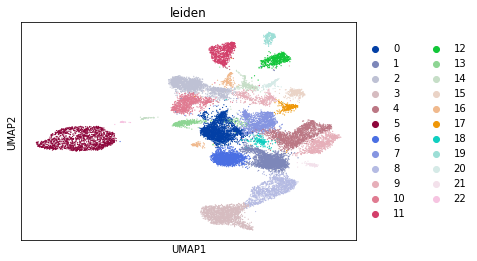

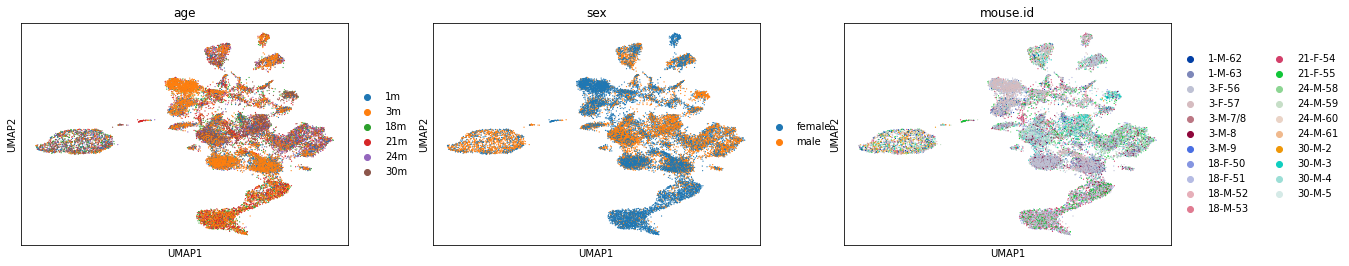

In [5]:
# # Reprocess t cell data
# dic_data_proc = {}
# for ds in DS_LIST:
#     print(ds)
#     ind_select = [('T cell' in x)  for x in dic_data_raw[ds].obs['tissue_celltype']]
#     adata = dic_data_raw[ds][ind_select,:].copy()
#     print('# Before filter: n_cell=%d'%adata.shape[0])
#     sc.pp.filter_cells(adata, min_genes=250)
#     sc.pp.filter_genes(adata, min_cells=50)
#     print('# After filter: n_cell=%d'%adata.shape[0])
#     adata.obs['batch_harmony'] = adata.obs['mouse.id']
#     adata.obs['batch_harmony'] = adata.obs['batch_harmony'].astype('category')

#     sc.pp.highly_variable_genes(adata, subset = False, min_disp=.5, 
#                                 min_mean=.0125, max_mean=10, n_bins=20, n_top_genes=None)
#     sc.pp.scale(adata, max_value=10, zero_center=False)
#     sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
#     sc.external.pp.harmony_integrate(adata, key='batch_harmony', max_iter_harmony=20)
#     sc.pp.neighbors(adata, n_neighbors=50, n_pcs=20, use_rep="X_pca_harmony")
#     sc.tl.leiden(adata, resolution=0.7)   
#     sc.tl.umap(adata)
#     sc.pl.umap(adata, color='cell_ontology_class')
#     sc.pl.umap(adata, color='leiden')
#     sc.pl.umap(adata, color=['age', 'sex', 'mouse.id'])
#     adata.write('/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/single_cell_data/tms_proc/'
#                 'tcell.%s.h5ad'%ds)

### Annotate tcell.facs.h5ad data

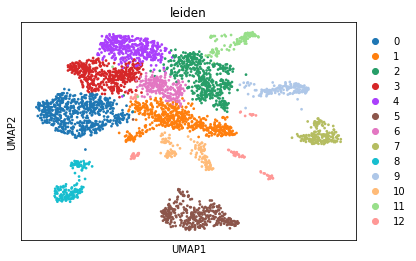

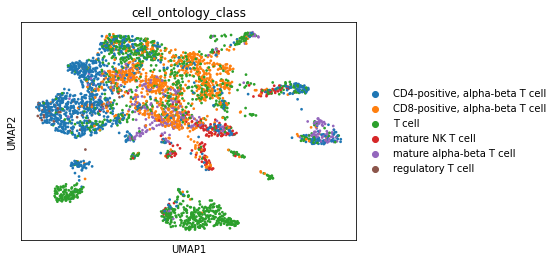

,cell
leiden,
0,629
1,560
2,499
3,490
4,402
5,370
6,246
7,176
8,165


cell
leiden cell_ontology_class                   
0      CD4-positive, alpha-beta T cell  486.0
       T cell                            74.0
       regulatory T cell                 41.0
1      CD4-positive, alpha-beta T cell   52.0
       CD8-positive, alpha-beta T cell  211.0
       T cell                            71.0
       mature NK T cell                  78.0
       mature alpha-beta T cell         147.0
2      CD4-positive, alpha-beta T cell   30.0
       CD8-positive, alpha-beta T cell  310.0
       T cell                           159.0
3      CD4-positive, alpha-beta T cell  236.0
       CD8-positive, alpha-beta T cell  158.0
       T cell                            53.0
       mature alpha-beta T cell          36.0
4      CD4-positive, alpha-beta T cell  126.0
       CD8-positive, alpha-beta T cell   81.0
       T cell                           195.0
5      T cell                           340.0
6      CD8-positive, alpha-beta T cell  165.0
       T cell                            46.0
       mature alpha-beta T cell          28.0
7      CD4-positive, alpha-beta T cell   64.0
       T cell                            29.0
       mature alpha-beta T cell          75.0
8      CD4-positive, alpha-beta T cell   48.0
       T cell                           113.0
9      CD4-positive, alpha-beta T cell   62.0
       T cell                            47.0
       mature NK T cell                  38.0
10     CD8-positive, alpha-beta T cell   31.0
       mature NK T cell                  58.0
11     CD8-positive, alpha-beta T cell   26.0
       T cell                            57.0
12     T cell                            66.0
13     T cell                            36.0

In [6]:
dic_data_proc = {}
for ds in ['facs', 'droplet']:   
    dic_data_proc[ds] = read_h5ad('/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/single_cell_data/'
                                  'tms_proc/tcell.%s.h5ad'%ds)

# Annotation info: cluster label
adata = dic_data_proc['facs'].copy()
temp_df = adata.obs.groupby(['leiden']).agg({'cell':len})
cluster_list = list(temp_df.index[temp_df['cell']>50])
sc.pl.umap(adata[adata.obs['leiden'].isin(cluster_list)], color='leiden')
sc.pl.umap(adata[adata.obs['leiden'].isin(cluster_list)], color='cell_ontology_class')

temp_df = adata.obs.groupby(['leiden']).agg({'cell':len})
display(temp_df.loc[temp_df['cell']>25])
temp_df = adata.obs.groupby(['leiden', 'cell_ontology_class']).agg({'cell':len})
display(temp_df.loc[temp_df['cell']>25])

# Before filter: n_cell=4145
# After filter: n_cell=3769


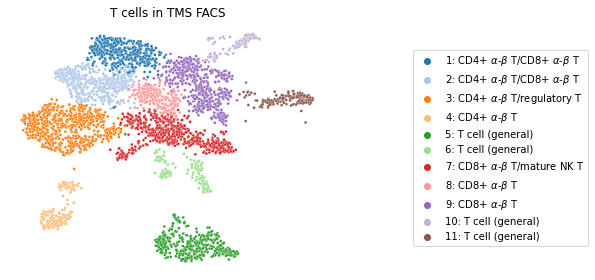

In [7]:
adata = dic_data_proc['facs'].copy()

# Add TMS annotation for new leiden clusters 
dic_annot = {'0': [3, r'CD4+ $\alpha$-$\beta$ T/regulatory T'], # Tnfrsf4 (OX40, effector), Ctla,Foxp3 (Treg)
             '1': [7, r'CD8+ $\alpha$-$\beta$ T/mature NK T'], # Effector Cd8 
             '2': [9, r'CD8+ $\alpha$-$\beta$ T'], # Effector Cd8
             '3': [2, r'CD4+ $\alpha$-$\beta$ T/CD8+ $\alpha$-$\beta$ T'], # Clearly naive 
             '4': [1, r'CD4+ $\alpha$-$\beta$ T/CD8+ $\alpha$-$\beta$ T'], # Clearly naive 
             '5': [5, r'T cell (general)'], # Cd4- Cd8-, may not be typical T cells
             '6': [8, r'CD8+ $\alpha$-$\beta$ T'], # Effector Cd8, does seem to be functioning yet
             '7': ['', r'rm'], # Contains B cells and macrophage markers, suspicious
             '8': [4, r'CD4+ $\alpha$-$\beta$ T'], # Klrg1 is related to apoptosis
             '9': [11, r'T cell (general)'], 
             '10': [6, r'T cell (general)'], # Apoe is weird
             '11': [10, r'T cell (general)'], # 
            }
adata.obs['leiden_reorder'] = [dic_annot[x][0] if x in dic_annot else 'rm' for x in adata.obs['leiden']]
adata.obs['leiden_anno'] = [dic_annot[x][1] if x in dic_annot else 'rm' for x in adata.obs['leiden']]

print('# Before filter: n_cell=%d'%adata.shape[0])
adata = adata[adata.obs['leiden_anno']!='rm'].copy()
adata.obs['leiden_reorder'] = adata.obs['leiden_reorder'].astype('category')
adata.obs['leiden_anno'] = adata.obs['leiden_anno'].astype('category')
print('# After filter: n_cell=%d'%adata.shape[0])

# Figure 
df_plot = pd.DataFrame(index=adata.obs_names,
                       data={'UMAP1':adata.obsm['X_umap'][:,0],
                             'UMAP2':adata.obsm['X_umap'][:,1]}, dtype=float)
df_plot = df_plot.join(adata.obs[['leiden_reorder', 'leiden_anno']])
df_plot['label'] = ['%s: %s'%(x,y) for x,y in zip(df_plot['leiden_reorder'], df_plot['leiden_anno'])]
df_plot['label'] = df_plot['label'].astype('category')

hue_list = []
for x in df_plot['leiden_reorder'].cat.categories:
    for y in set(df_plot['label']):
        if y.startswith('%s: '%x):
            hue_list.append(y)

plt.figure(figsize=[9,4])
ax = plt.subplot(1,1,1)
ax.axis('off')
g = sns.scatterplot(data=df_plot, x='UMAP1', y='UMAP2', hue='label', s=8, palette='tab20', hue_order=hue_list)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('T cells in TMS FACS')
plt.tight_layout()
plt.show()

In [13]:
# Assign dpt_cd4 and dpt_cd8
sc.tl.diffmap(adata)
root_cell = adata.obs_names[np.argmin(adata.obsm['X_umap'][:,0]+
                                      100*(adata.obs['leiden_anno']!=
                                           r'CD4+ $\alpha$-$\beta$ T/CD8+ $\alpha$-$\beta$ T'))]

# Cd4 trajectory 
cluster_list = [r'CD4+ $\alpha$-$\beta$ T', 
                r'CD4+ $\alpha$-$\beta$ T/regulatory T',
                r'CD4+ $\alpha$-$\beta$ T/CD8+ $\alpha$-$\beta$ T']
temp_data = adata[adata.obs['leiden_anno'].isin(cluster_list), :].copy()
temp_data.uns['iroot'] = np.where(temp_data.obs_names==root_cell)[0][0]
sc.tl.dpt(temp_data)
adata.obs['dpt_cd4'] = -1
adata.obs.loc[temp_data.obs_names, 'dpt_cd4'] = temp_data.obs['dpt_pseudotime']
print('CD4 n_cell=%d'%temp_data.shape[0])
print('Clusters: %s'%','.join([str(x) for x in sorted(set(temp_data.obs['leiden_reorder']))]))

# Cd8 trajectory
cluster_list = [r'CD8+ $\alpha$-$\beta$ T',
                r'CD4+ $\alpha$-$\beta$ T/CD8+ $\alpha$-$\beta$ T', 
                r'CD8+ $\alpha$-$\beta$ T/mature NK T']
temp_data = adata[adata.obs['leiden_anno'].isin(cluster_list), :].copy()
temp_data.uns['iroot'] = np.where(temp_data.obs_names==root_cell)[0][0]
sc.tl.dpt(temp_data)
adata.obs['dpt_cd8'] = -1
adata.obs.loc[temp_data.obs_names, 'dpt_cd8'] = temp_data.obs['dpt_pseudotime']
print('CD8 n_cell=%d'%temp_data.shape[0])
print('Clusters: %s'%','.join([str(x) for x in sorted(set(temp_data.obs['leiden_reorder']))]))

# Compute quantile normalizaed version 
def qn(x):
    v_rank = np.zeros(x.shape[0])
    v_rank[np.argsort(x)] = np.arange(x.shape[0])
    return v_rank/v_rank.shape[0]

for term in ['dpt_cd4', 'dpt_cd8']:
    ind_select = adata.obs[term]>=0
    adata.obs['%s_qn'%term] = -1
    adata.obs.loc[ind_select, '%s_qn'%term] = qn(adata.obs.loc[ind_select, term])
    
# adata.write('/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/single_cell_data/tms_proc/'
#             'tcell.facs.annot.h5ad')

CD4 n_cell=1686
Clusters: 1,2,3,4
CD8 n_cell=2197
Clusters: 1,2,7,8,9


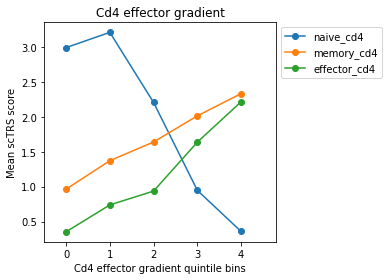

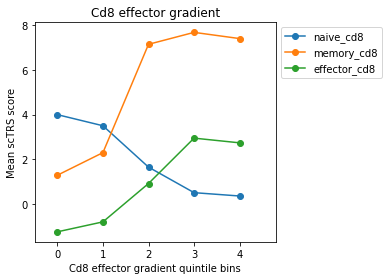

In [14]:
# Correlation with T signatures
trait_list_plot = sorted([x.replace('.raw_score','') for x in dic_score['facs_tsig'].columns if 'raw_score' in x])

plot_list = [['dpt_cd4_qn', ['naive_cd4', 'memory_cd4', 'effector_cd4']],
             ['dpt_cd8_qn', ['naive_cd8', 'memory_cd8', 'effector_cd8']], 
            ]

ds = 'facs_tsig'
dic_title = {'dpt_cd4_qn': 'Cd4 effector gradient', 
             'dpt_cd8_qn': 'Cd8 effector gradient'}
nrow,ncol =2,4
for i_plot,temp_list in enumerate(plot_list):
    term,sig_list = temp_list
    df_plot = adata.obs[[term]].copy()
    df_plot = df_plot.loc[df_plot[term]>0]
    df_plot = df_plot.join(dic_score[ds].loc[adata.obs_names, ['%s.norm_score'%x for x in sig_list]])
    df_plot['bin'] = pd.qcut(df_plot[term], q=5, labels=False)
    
    plt.figure(figsize=[5.5,4])
    i_color = 0
    for sig in sig_list:
        temp_df = df_plot.groupby('bin').agg({'%s.norm_score'%sig: [np.mean, np.std]})
        plt.plot(temp_df.index, temp_df['%s.norm_score'%sig]['mean'], 'o-', label=sig, color='C%d'%i_color)
        i_color+=1
    
    plt.xlim([-0.5,4.8])
    plt.legend(bbox_to_anchor=[1,1], loc='upper left')
    plt.xlabel('%s quintile bins'%dic_title[term])
    plt.ylabel('Mean scTRS score')
    plt.title(dic_title[term])
    plt.tight_layout()
#     plt.savefig(FIG_PATH+'/dpt_tsig_corr.%s.svg'%term)
    plt.show()

In [21]:
# Compare with existing result
adata_ref = read_h5ad('/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/single_cell_data/tms_proc/'
                      'tcell.facs.annot.h5ad')
np.corrcoef(adata_ref.obs['dpt_cd4_qn'], adata.obs['dpt_cd4_qn'])

array([[1., 1.],
       [1., 1.]])

### Check markers 

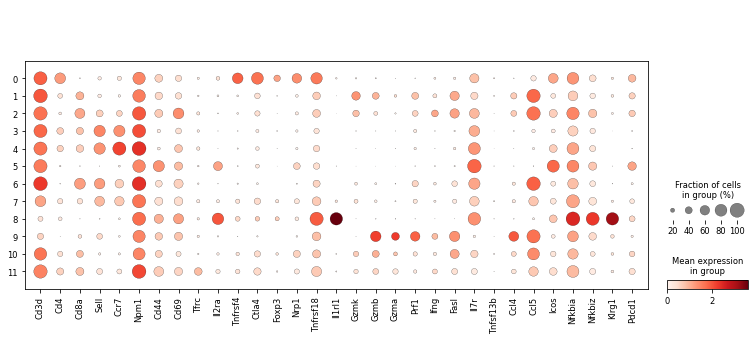

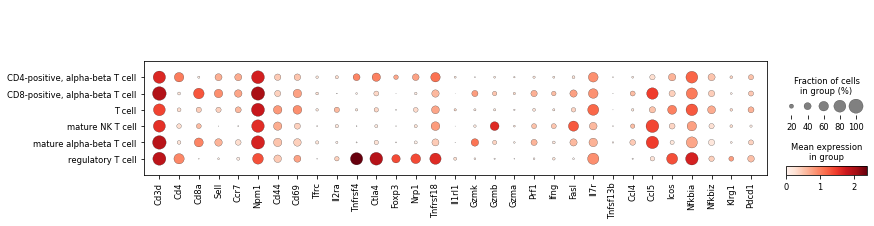

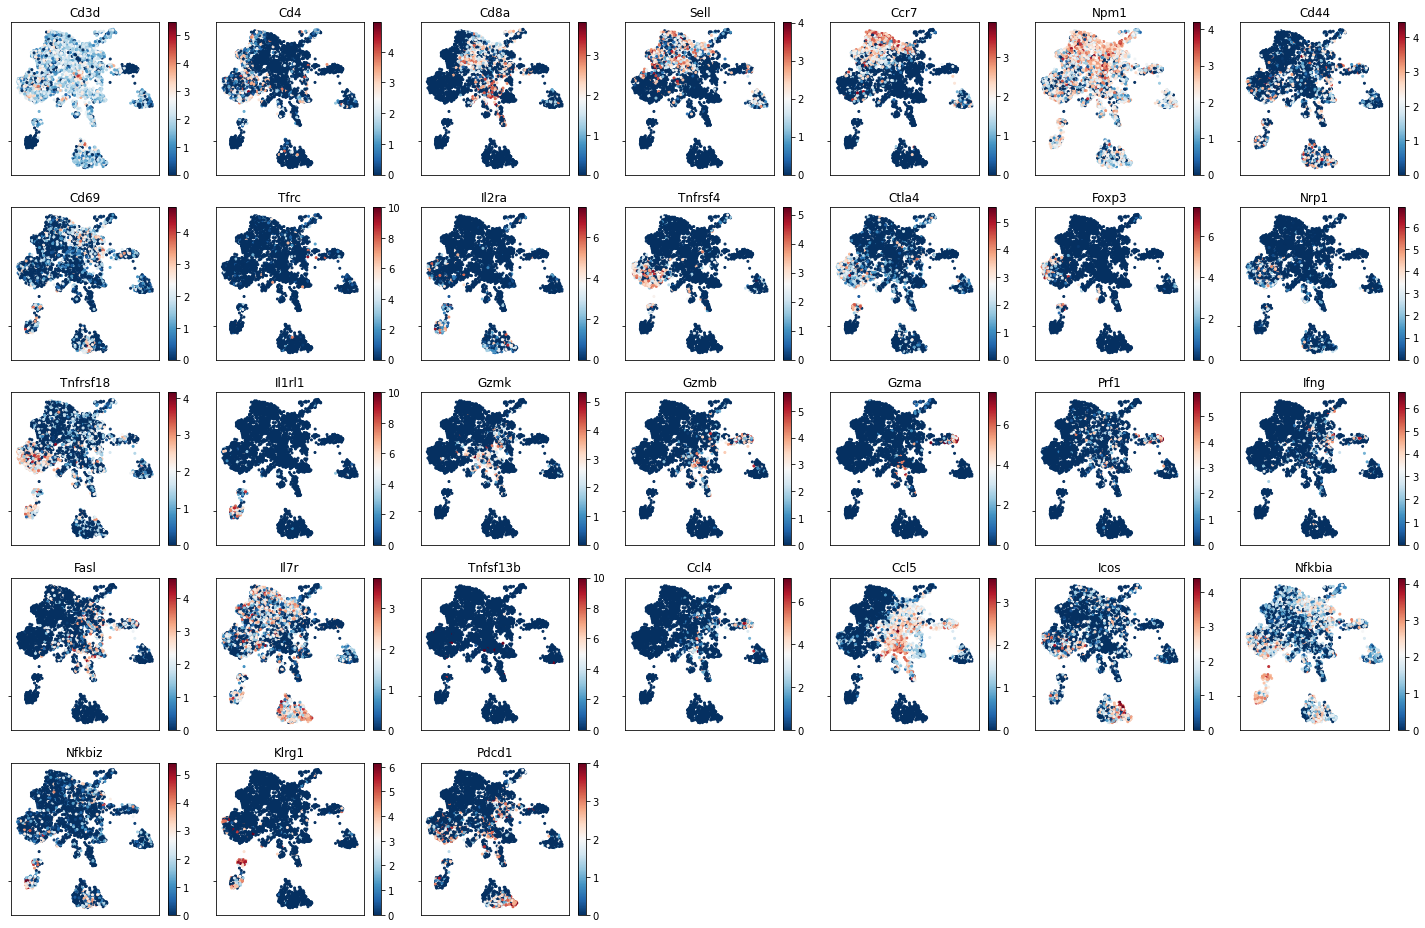

In [70]:
# Annotation info: marker gene expression
marker_list = ['Cd3d', 'Cd4', 'Cd8a', # Basic
               'Sell', 'Ccr7', 'Npm1', 'Cd44', # Naive Cd44-               
               'Cd69', 'Tfrc', 'Il2ra', 'Tnfrsf4', # Activation: Cd69, Cd71, Cd25 (also Treg)
               'Ctla4', 'Foxp3', 'Nrp1', 'Tnfrsf18', 'Il1rl1', # Treg
               'Gzmk', 'Gzmb', 'Gzma', 'Prf1', 'Ifng', 'Fasl', # Cd8+ cytotoxic T cells
               'Il7r', 'Tnfsf13b', 'Ccl4', 'Ccl5', # effector memory
               'Icos', 'Nfkbia', 'Nfkbiz', 'Klrg1', 'Pdcd1', # Others
              ]

adata = dic_data_proc['facs'].copy()
temp_df = adata.obs.groupby(['leiden']).agg({'cell':len})
cluster_list = list(temp_df.index[temp_df['cell']>100])
adata = adata[adata.obs['leiden'].isin(cluster_list)]

for gene in marker_list.copy():
    if gene not in adata.var_names:
        print(gene)
        marker_list.remove(gene)
        
# Dotplot 
sc.pl.dotplot(adata, marker_list, groupby='leiden')
sc.pl.dotplot(adata, marker_list, groupby='cell_ontology_class')

# Scatter plot
df_plot = pd.DataFrame(index=adata.obs_names,
                       data={'UMAP1':adata.obsm['X_umap'][:,0],
                             'UMAP2':adata.obsm['X_umap'][:,1]})
for gene in marker_list:
    df_plot[gene] = adata[:, gene].X.toarray()

plt.figure(figsize=[20,13])
for igene,gene in enumerate(marker_list):
    plt.subplot(5,7,igene+1)
    plt.scatter(df_plot['UMAP1'], df_plot['UMAP2'], c=df_plot[gene],
                cmap='RdBu_r', s=4)
    plt.colorbar()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([0],[''])
    plt.yticks([0],[''])
    plt.title(gene)

plt.tight_layout()
plt.show()

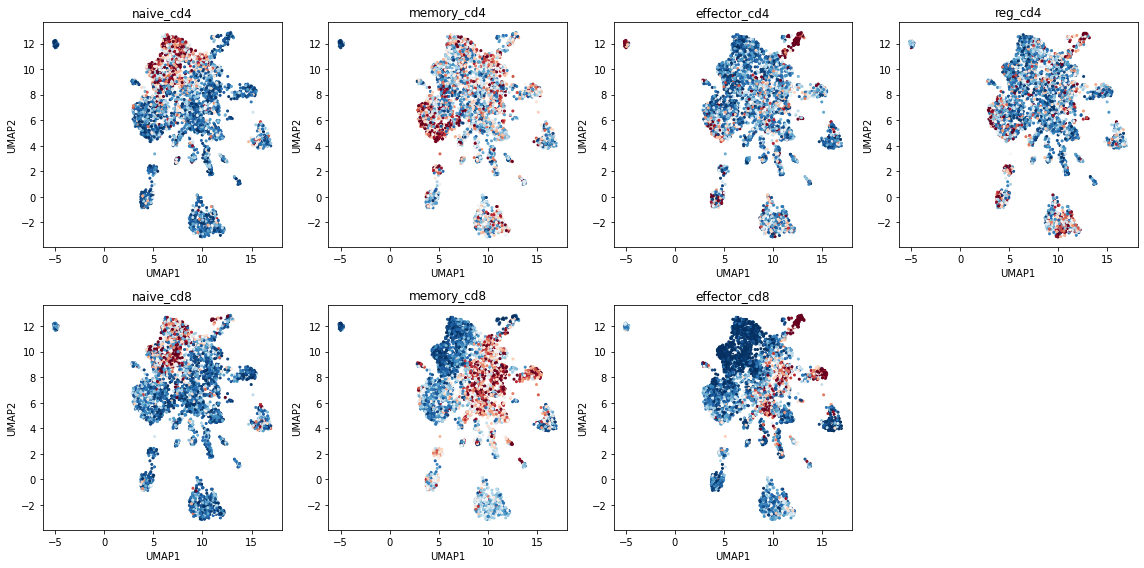

In [71]:
# Annotation info: tsig scores
adata = dic_data_proc['facs'].copy()
trait_list_plot = DIC_TRAIT_LIST['facs_tsig']
ds = 'facs'
score_name = 'facs_tsig'
nrow,ncol =2,4

plt.figure(figsize=[16, 8])
for i_trait,trait in enumerate(trait_list_plot):
    plt.subplot(nrow,ncol,i_trait+1)
    df_plot = pd.DataFrame(index=dic_data_proc[ds].obs_names,
                           data={'UMAP1':dic_data_proc[ds].obsm['X_umap'][:,0],
                                 'UMAP2':dic_data_proc[ds].obsm['X_umap'][:,1]})
    df_plot = df_plot.loc[list(set(df_plot.index) & set(dic_score[score_name].index))]
    df_plot = df_plot.join(dic_score[score_name]['%s.nlog10_pval'%trait])

    plt.scatter(df_plot['UMAP1'], df_plot['UMAP2'], c=df_plot['%s.nlog10_pval'%trait],
                cmap='RdBu_r', vmax=np.quantile(df_plot['%s.nlog10_pval'%trait], q=0.95), vmin=0, s=4)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(trait)

plt.tight_layout()
plt.show()